In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



Pros/Cons:

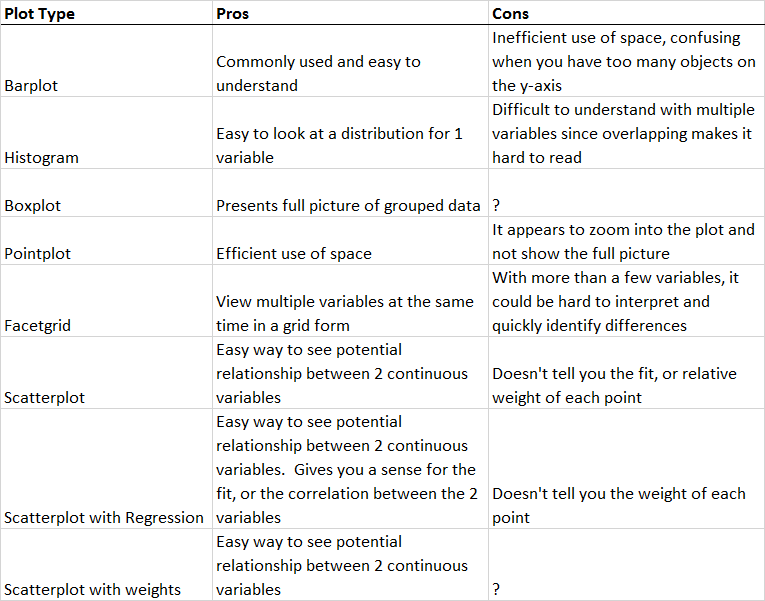

In [104]:
#load shooting data
median_household_income = pd.read_csv('MedianHouseholdIncome2015.csv', encoding="windows-1252")
police_killings = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
city_population_2015 = pd.read_csv('city_populations_2015.csv')

#Group killings by city and add count (death_count)
df_killings_grouped_city_state = police_killings.groupby(['city', 'state']).size().reset_index(name='death_count').sort_values(['death_count'], ascending=[False])

#Replace the word ' city' with empty string since each city contains this string at the end
median_household_income['city'] = median_household_income['city'].str.replace(' city','')

#Join grouped death count by city with median income by city, and then with city population
df_killings_grouped_city_state_median = pd.merge(df_killings_grouped_city_state, median_household_income, on=['city','state'], how='outer')
df_killings_grouped_city_state_median_population = pd.merge(df_killings_grouped_city_state_median, city_population_2015, on=['city','state'], how='outer')

#Where cities aren't found, drop the record
df_killings_grouped_city_state_median_population = df_killings_grouped_city_state_median_population.dropna(subset=['median_income'])
df_killings_grouped_city_state_median_population = df_killings_grouped_city_state_median_population.dropna(subset=['pop'])
df_killings_grouped_city_state_median_population = df_killings_grouped_city_state_median_population.dropna(subset=['death_count'])

#median income = 48617.500000
df_killings_grouped_city_state_median_population['income_level'] = 'other'
df_killings_grouped_city_state_median_population.loc[df_killings_grouped_city_state_median_population['median_income'] <= 48617.500000, 'income_level'] = 'low'
df_killings_grouped_city_state_median_population.loc[df_killings_grouped_city_state_median_population['median_income'] > 48617.500000, 'income_level'] = 'high'
df_killings_grouped_city_state_median_population['death_count_per_million_per_year'] = ((df_killings_grouped_city_state_median_population['death_count']/df_killings_grouped_city_state_median_population['pop'])*1000000)/3


#median population = 1.051500e+05
df_killings_grouped_city_state_median_population['population_size'] = 'other'
df_killings_grouped_city_state_median_population.loc[df_killings_grouped_city_state_median_population['pop'] <= 1.051500e+05, 'population_size'] = 'low'
df_killings_grouped_city_state_median_population.loc[df_killings_grouped_city_state_median_population['pop'] > 1.051500e+05, 'population_size'] = 'high'


#median death count per million per year = 5.021565
df_killings_grouped_city_state_median_population['death_count'] = 'other'
df_killings_grouped_city_state_median_population.loc[df_killings_grouped_city_state_median_population['death_count_per_million_per_year'] <= 5.021565, 'death_count'] = 'low'
df_killings_grouped_city_state_median_population.loc[df_killings_grouped_city_state_median_population['death_count_per_million_per_year'] > 5.021565, 'death_count'] = 'high'

#Create dataframe for top 15 cities with most police fatalities using normalized data
df_top_normalized = df_killings_grouped_city_state_median_population.sort_values(['death_count_per_million_per_year'], ascending=[False]).head(15)


#Determine median income level to assign low/high income
df_killings_grouped_city_state_median_population.describe()
df_killings_grouped_city_state_median_population.head()


,city,state,death_count,median_income,pop,income_level,death_count_per_million_per_year,population_size
0,Los Angeles,CA,low,50205.0,3971883.0,high,3.273007,high
1,Phoenix,AZ,high,47326.0,1563025.0,low,6.611112,high
2,Houston,TX,low,46187.0,2296224.0,low,3.774312,high
3,Chicago,IL,low,48522.0,2720546.0,low,3.063111,high
4,Las Vegas,NV,high,50202.0,623747.0,high,11.222499,high


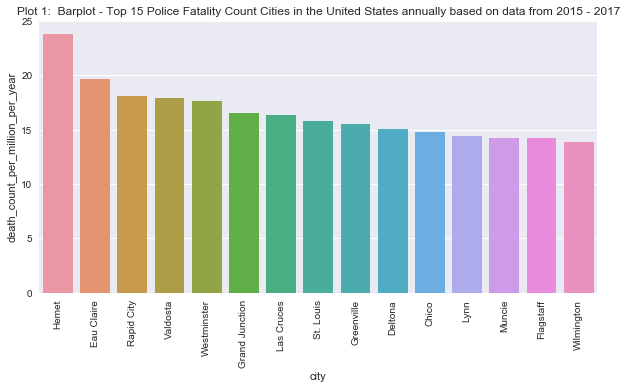

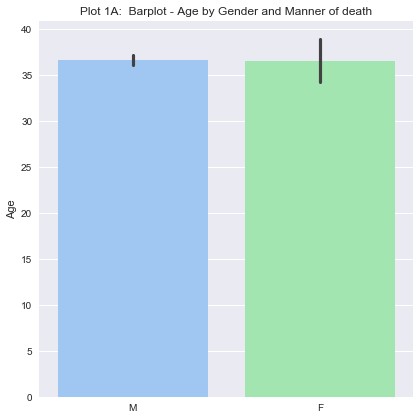

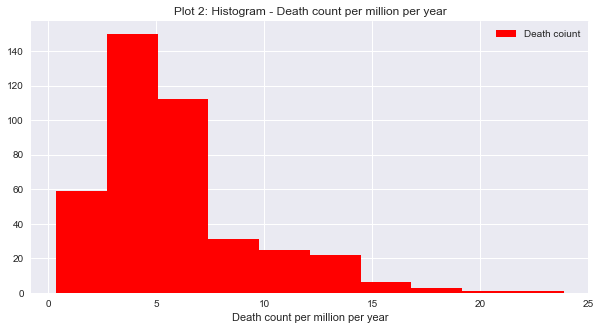

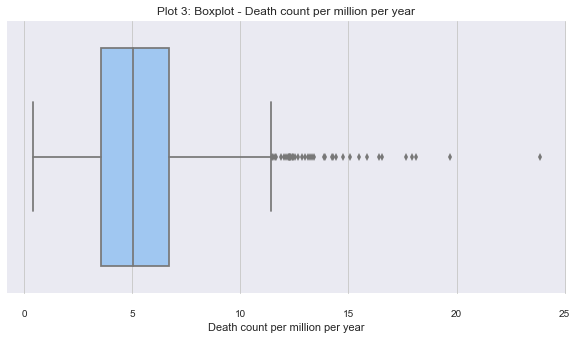

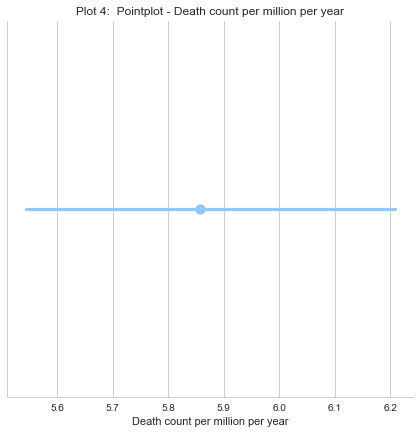

In [128]:
#Question 1:  Choose one variable and plot that variable four different ways.
#top 15 counts
#plot 1
plt.figure(figsize=(10, 5))
sns.barplot(x="city", y="death_count_per_million_per_year", data=df_top_normalized)
plt.title('Plot 1:  Barplot - Top 15 Police Fatality Count Cities in the United States annually based on data from 2015 - 2017')
plt.xticks(rotation=90)
sns.set(style="darkgrid")

g = sns.factorplot(x="gender", y="age", data=police_killings,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Plot 1A:  Barplot - Age by Gender')
plt.show()



#plot 2
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.hist(df_killings_grouped_city_state_median_population['death_count_per_million_per_year'], color='red',label='Death coiunt')  # alpha just controls the opacity
plt.xlabel('Death count per million per year')
plt.legend(loc='upper right')
plt.title('Plot 2: Histogram - Death count per million per year')
plt.show()

#plot 3
# Setting the overall aesthetic.
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.set(style="whitegrid")
ax = sns.boxplot(x='death_count_per_million_per_year',data=df_killings_grouped_city_state_median_population,palette='pastel')  
plt.title('Plot 3: Boxplot - Death count per million per year')
sns.despine(offset=10, trim=True)
ax.set(xlabel='Death count per million per year')
plt.show()

#plot 4
# Setting the overall aesthetic.
sns.set(style="whitegrid")
g = sns.factorplot(x="death_count_per_million_per_year", data=df_killings_grouped_city_state_median_population,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
#g.despine(left=True)
g.set(xlabel='Death count per million per year')
plt.title('Plot 4:  Pointplot - Death count per million per year')
plt.show()

In [109]:
df_killings_grouped_city_state_median_population.head()

,city,state,death_count,median_income,pop,income_level,death_count_per_million_per_year,population_size
0,Los Angeles,CA,low,50205.0,3971883.0,high,3.273007,high
1,Phoenix,AZ,high,47326.0,1563025.0,low,6.611112,high
2,Houston,TX,low,46187.0,2296224.0,low,3.774312,high
3,Chicago,IL,low,48522.0,2720546.0,low,3.063111,high
4,Las Vegas,NV,high,50202.0,623747.0,high,11.222499,high


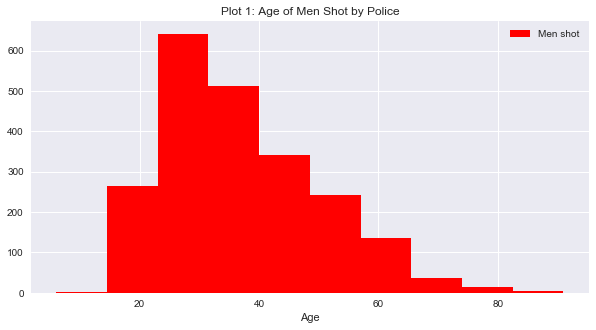

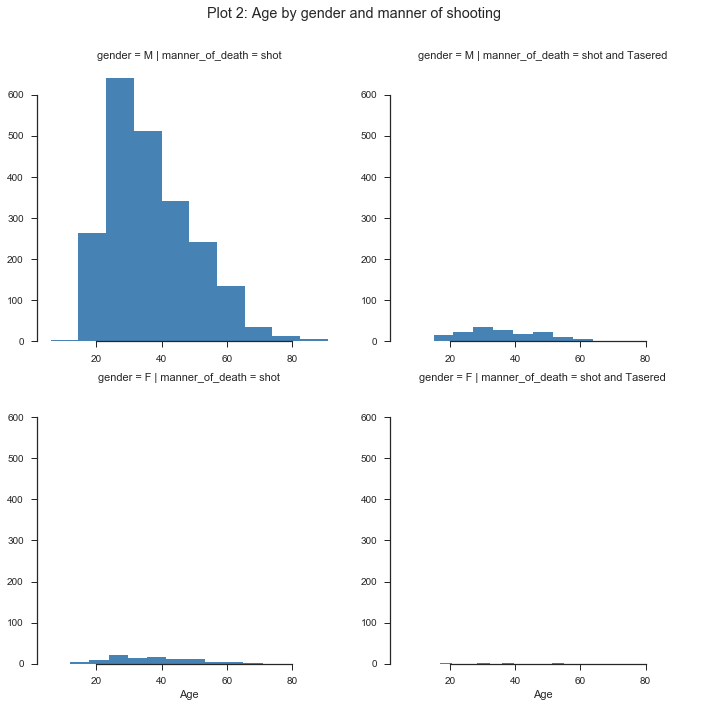

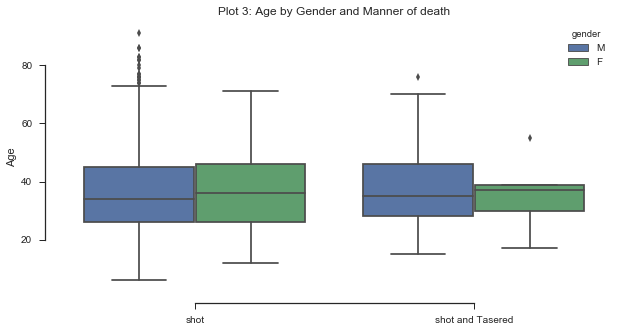

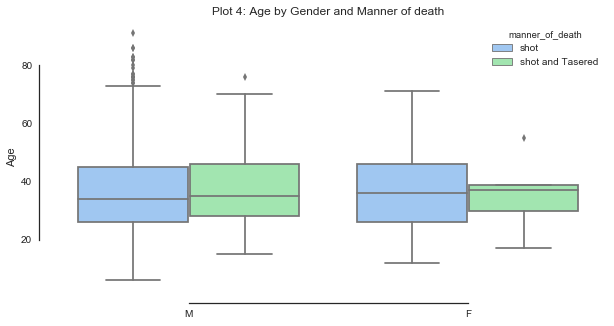

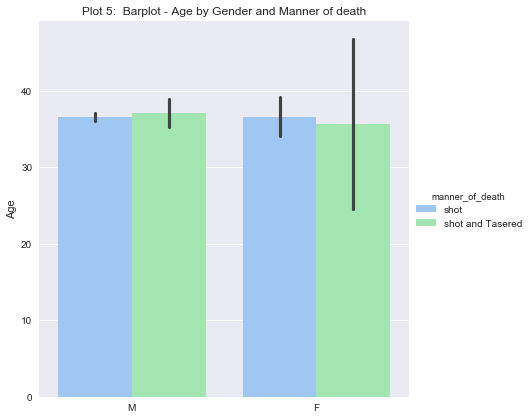

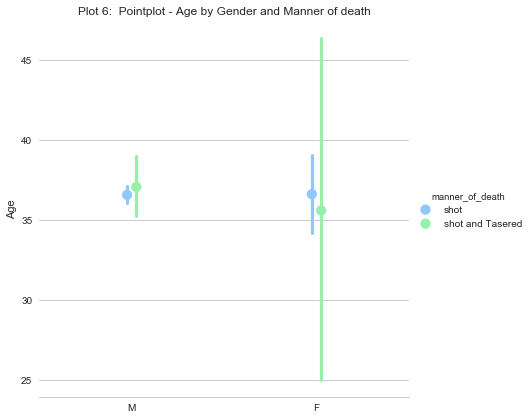

In [75]:
#variable = age of men that were shot
menshotage = police_killings.loc[(police_killings['gender']=='M')&(police_killings['manner_of_death']=='shot'),'age']
plt.figure(figsize=(10, 5))

#Plot 1
plt.hist(menshotage.dropna(), color='red',label='Men shot')  # alpha just controls the opacity
plt.xlabel('Age')
plt.legend(loc='upper right')
plt.title('Plot 1: Age of Men Shot by Police')
plt.show()

#Plot 2
# Showing the  information in a seaborn facet grid.
sns.set(style="ticks")  #Setting the overall aesthetic


# Tell seaborn about the structure of our data.
ax = sns.FacetGrid(police_killings, row="gender", col="manner_of_death", size=5)
# Name the plot type and the variable to be plotted using the structure.
ax.map(plt.hist, "age", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
ax.set_axis_labels('Age')
plt.suptitle('Plot 2: Age by gender and manner of shooting')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

#Plot 3
# Comparing groups using boxplots.
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax = sns.boxplot(x='manner_of_death',y='age',hue='gender',data=police_killings)  
plt.title('Plot 3: Age by Gender and Manner of death')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Age')
plt.show()

#Plot 4
# Setting the overall aesthetic.
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.set(style="whitegrid")
ax = sns.boxplot(x='gender',y='age',hue='manner_of_death',data=police_killings,palette='pastel')  
plt.title('Plot 4: Age by Gender and Manner of death')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='Age')
plt.show()

#Plot 5
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x="gender", y="age", hue="manner_of_death", data=police_killings,
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Plot 5:  Barplot - Age by Gender and Manner of death')
plt.show()


#Plot 6
# Setting the overall aesthetic.
sns.set(style="whitegrid")

g = sns.factorplot(x="gender", y="age", hue="manner_of_death", data=police_killings,
                   size=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Plot 6:  Pointplot - Age by Gender and Manner of death')
plt.show()

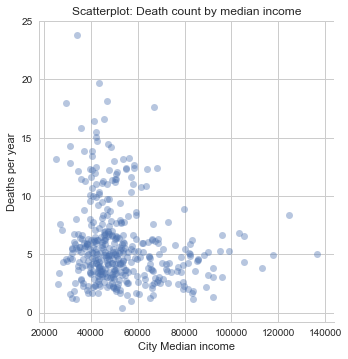

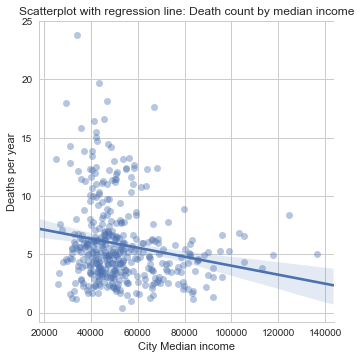

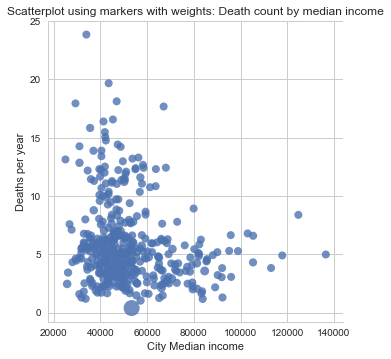

In [103]:
g = sns.lmplot(y='death_count_per_million_per_year', # Variable 1.
               x='median_income', # Variable 2.
               data=df_killings_grouped_city_state_median_population, # Data
               fit_reg=False, # If set to true, pldf_killings_grouped_city_state_median_populationots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Deaths per year")
g.set_xlabels("City Median income")
plt.title('Scatterplot: Death count by median income')
plt.show()

g = sns.lmplot(y='death_count_per_million_per_year', 
               x='median_income',
               data=df_killings_grouped_city_state_median_population, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Deaths per year")
g.set_xlabels("City Median income")
plt.title('Scatterplot with regression line: Death count by median income')
plt.show()


#size marker for scatter plot
s = lambda z : (((z-z.min())/float(z.max()-z.min())+1)*8)**2


g = sns.lmplot(y='death_count_per_million_per_year', # Variable 1.
               x='median_income', # Variable 2.
               data=df_killings_grouped_city_state_median_population, # Data
               fit_reg=False, # If set to true, pldf_killings_grouped_city_state_median_populationots a regression line.
               scatter_kws={'s':s(z)}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Deaths per year")
g.set_xlabels("City Median income")
plt.title('Scatterplot using markers with weights: Death count by median income')
plt.show()


